In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit

In [8]:
np.random.seed(42)
time=np.arange(1, 101)
trend=0.5*time
noise=np.random.normal(0, 5, size=len(time)) #np.random.normal( MEAN , STANDARD_DEVIATION , size )
y=trend+noise

In [12]:
df=pd.DataFrame({'time': time, 'target': y})
df.head()

,time,target
0,1,2.983571
1,2,0.308678
2,3,4.738443
3,4,9.615149
4,5,1.329233


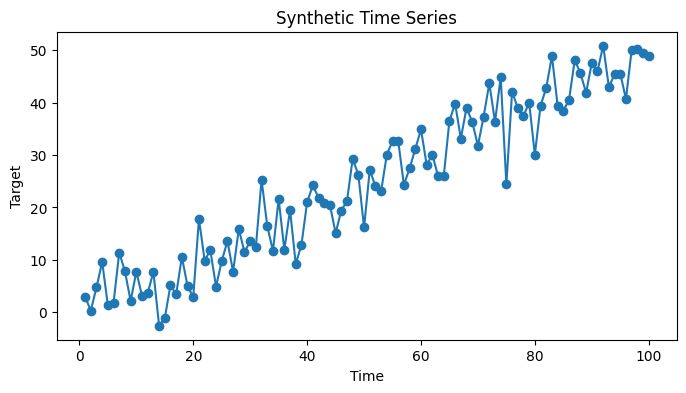

In [13]:
plt.figure(figsize=(8,4))
plt.plot(df['time'], df['target'], marker='o')
plt.title("Synthetic Time Series")
plt.xlabel("Time")
plt.ylabel("Target")
plt.show()

In [15]:
tscv=TimeSeriesSplit(n_splits=5)
model=LinearRegression()

In [16]:
# ✔️ iloc → always uses positions
# ✔️ loc → uses actual index labels

# 👉 “Index-based selection (position numbers)”
# (like: row 0, row 1, row 2…)

# 👉 “Label-based selection (actual index labels)”
# (like: row with index 10, row with index 25…)

In [19]:
fold=1
mse_scores=[]
r2_scores=[]

for train_idx, test_idx in tscv.split(df):
    X_train, X_test=df.loc[train_idx, ['time']], df.loc[test_idx, ['time']]
    y_train, y_test=df.loc[train_idx, ['target']], df.loc[test_idx, 'target']

    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)

    mse=mean_squared_error(y_test, y_pred)
    r2=r2_score(y_test, y_pred)

    mse_scores.append(mse)
    r2_scores.append(r2)

    print(f"Fold {fold}: Train {train_idx[0]}–{train_idx[-1]}, Test {test_idx[0]}–{test_idx[-1]}")
    print(f"  MSE: {mse:.2f}, R²: {r2:.3f}")
    fold += 1

Fold 1: Train 0–19, Test 20–35
  MSE: 106.04, R²: -3.404
Fold 2: Train 0–35, Test 36–51
  MSE: 21.29, R²: 0.186
Fold 3: Train 0–51, Test 52–67
  MSE: 28.73, R²: -0.219
Fold 4: Train 0–67, Test 68–83
  MSE: 31.05, R²: 0.075
Fold 5: Train 0–83, Test 84–99
  MSE: 10.16, R²: 0.282


In [20]:
print("\nMean MSE:", np.mean(mse_scores))
print("Mean R²:", np.mean(r2_scores))


Mean MSE: 39.457130363789645
Mean R²: -0.6159207304033131


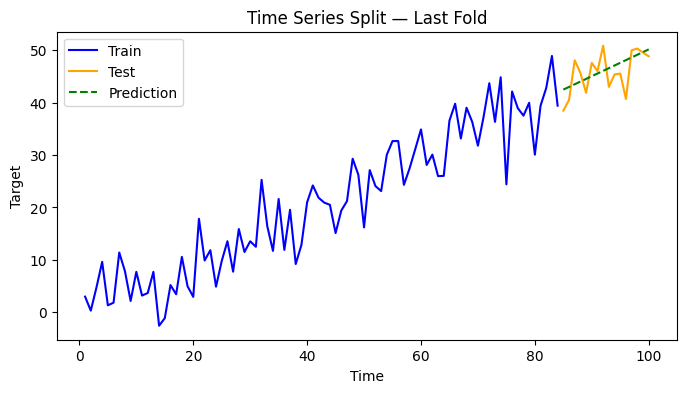

In [21]:
plt.figure(figsize=(8,4))
plt.plot(X_train, y_train, label='Train', color='blue')
plt.plot(X_test, y_test, label='Test', color='orange')
plt.plot(X_test, y_pred, label='Prediction', color='green', linestyle='--')
plt.legend()
plt.title("Time Series Split — Last Fold")
plt.xlabel("Time")
plt.ylabel("Target")
plt.show()